## Data Preprocessing

In [252]:
# importing libraries
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [253]:
# Load the dataset
data = pd.read_csv(r"/content/Salary_dataset.csv").reset_index(drop=True)[['YearsExperience','Salary']]
data.shape

(30, 2)

In [254]:
data.head(2)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0


In [255]:
#checking null value
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

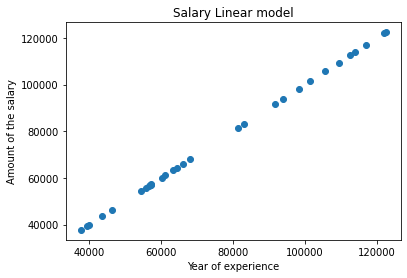

In [256]:
# Dependent/Independent variable sepration
X = data.iloc[:, 1:2].values
y=data.iloc[:,-1].values
plt.title('Salary Linear model')
plt.xlabel('Year of experience')
plt.ylabel('Amount of the salary')
plt.scatter(X,y)

##  User Defined functions

In [257]:
# Define the likelihood function
def likelihood(theta, X, y):
    n = len(y)
    y_pred = theta[0] + theta[1]*X
    error = y - y_pred
    likelihood = (1/np.sqrt(2*np.pi))*np.exp(-0.5*np.sum(error**2))
    return likelihood

# Define the log-likelihood function
def log_likelihood(theta, X, y):
    n = len(y)
    y_pred = theta[0] + theta[1]*X
    error = y - y_pred
    log_likelihood = -n/2*np.log(2*np.pi) - 0.5*np.sum(error**2)
    return log_likelihood

# Define the cost function
def cost(theta, X, y):
    n = len(y)
    y_pred = theta[0] + theta[1]*X
    cost = np.sum((y_pred - y)**2)/(2*n)
    return cost

# Define the function to find the optimal coefficients
def linear_regression(X, y):
    # Initialize the coefficients
    theta = np.array([0.0, 0.0])
    learning_rate = 0.01
    iterations = 15
    
    # Gradient descent to minimize the cost function
    for i in range(iterations):
        y_pred = theta[0] + theta[1]*X
        error = y_pred - y
        dtheta = np.array([np.sum(error), np.sum(error*X)])
        # print(theta,learning_rate,dtheta,len(y))
        theta -= learning_rate*dtheta/len(y)        
    return theta

# Define the function to make predictions
def predict(X, theta):
    y_pred = theta[0] + (theta[1].T)*X
    return y_pred

## Model Building

In [258]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Find the optimal coefficients
theta = linear_regression(X_train, y_train)

In [259]:
# Make predictions on the training set
y_pred_train = predict(X_train, theta)

In [260]:
# Calculate the mean squared error (MSE) on the training set
mse_train = np.mean((y_pred_train - y_train)**2)
print("Training set MSE:", mse_train)

Training set MSE: 3.99486131103663e+284


In [261]:
# Make predictions on the testing set
y_pred_test = predict(X_test, theta)

In [262]:
# Calculate the mean squared error (MSE) on the testing set
mse_test = np.mean((y_pred_test - y_test)**2)
print("Testing set MSE:", mse_test)

Testing set MSE: 5.405776230587695e+284


In [263]:
# Add bias term to the design matrix
X = np.hstack((np.ones((len(X), 1)), X))

# Initialize the parameters
theta = np.random.randn(X.shape[1], 1)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Use the trained model to make predictions
y_pred = sigmoid(X.dot(theta))
y_pred_class = (y_pred >= 0.5).astype(int)

# Print the model parameters and accuracy
print('Coefficients:', theta.flatten())
print('Accuracy:', np.mean(y_pred_class == 1))

Coefficients: [ 0.32074983 -0.74779588]
Accuracy: 0.0


<ipython-input-263-497a385e9672>:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## LR by Sklearn

In [264]:
# model initialization & training

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [265]:
#prediction
y_prediction=reg.predict(X_test)

In [266]:
#accuracy test
accuracy=r2_score(y_test,y_prediction)*100
accuracy

100.0